In [24]:
import numpy as np
import matplotlib.pyplot as plt
import ensembler_functions as ef
plt.rcParams['axes.linewidth'] = 2.5
import os
import h5py
import VAE_GAN_ensembler_functions as gan_ef
import ensembler_functions as ef
import matplotlib

### Look at muon pt

In [3]:
data_info = {
    "train_data_scheme": "topo2A_train", 
    "pt_normalization_type": "global_division", 
    "L1AD_rate": 1000, 
    "pt_thresholds": [50, 30, 30, 30], 
    "pt_scale_factor": 0.05,
    "comments": ""
}
datasets = ef.load_and_preprocess_and_preprocess(data_info=data_info, overlap_removal=False, duplicate_removal=False, obj_type='HLT', tag='EB_test')

Loaded EB_473255 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/EB_473255.h5
Loaded EB_475321 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/EB_475321.h5
Loaded EB_482596 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/EB_482596.h5
Loaded HLT_noalg_eb_L1All from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/HLT_noalg_eb_L1All.h5
Loaded mc23e_ChiPlusChiMinus100_99_0p3ns from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/mc23e_ChiPlusChiMinus100_99_0p3ns.h5
Loaded mc23e_ChiPlusChiMinus500_40_10ns from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/mc23e_ChiPlusChiMinus500_40_10ns.h5
Loaded mc23e_HAHMggf from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/mc23e_HAHMggf.h5
Loaded mc23e_HNLeemu from /eos/ho

2025-03-10 14:56:25.688033: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1741614985.941271     501 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


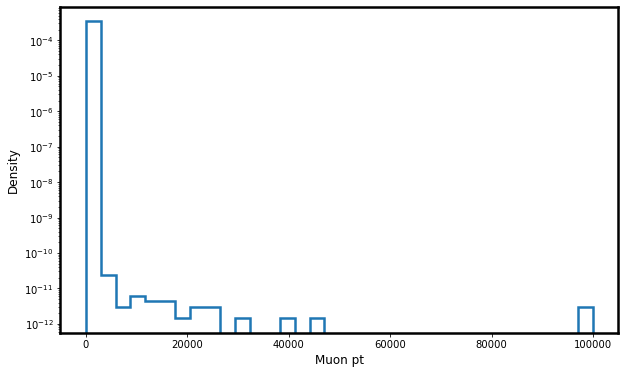

In [45]:
max_pt=100000
bins = np.linspace(0, max_pt, 35)

leading_muon_pt = np.clip(datasets['EB_test']['HLT_data'][:, 27], a_min=0, a_max=max_pt)
weights = datasets['EB_test']['weights']


plt.figure(figsize=(10, 6))
plt.hist(leading_muon_pt, bins=bins, density=True, histtype='step', linewidth=2.5, fill=False, weights=weights)


plt.xlabel('Muon pt', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.yscale('log')
plt.show()

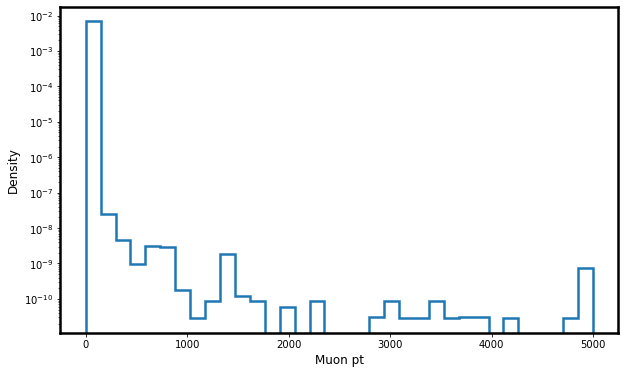

In [43]:
max_pt=5000
bins = np.linspace(0, max_pt, 35)

leading_muon_pt = np.clip(datasets['EB_test']['HLT_data'][:, 27], a_min=0, a_max=max_pt)
weights = datasets['EB_test']['weights']


plt.figure(figsize=(10, 6))
plt.hist(leading_muon_pt, bins=bins, density=True, histtype='step', linewidth=2.5, fill=False, weights=weights)


plt.xlabel('Muon pt', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.yscale('log')
plt.show()

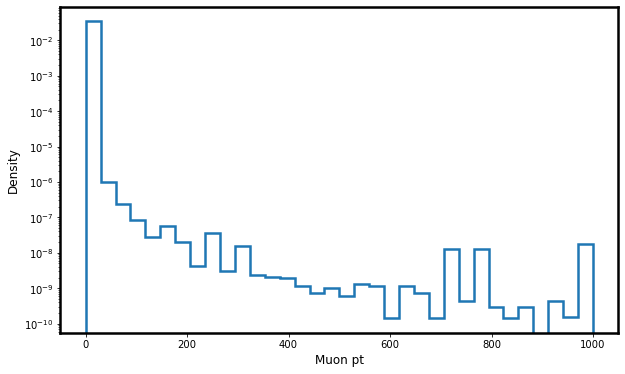

In [42]:
max_pt=1000
bins = np.linspace(0, max_pt, 35)

leading_muon_pt = np.clip(datasets['EB_test']['HLT_data'][:, 27], a_min=0, a_max=max_pt)
weights = datasets['EB_test']['weights']


plt.figure(figsize=(10, 6))
plt.hist(leading_muon_pt, bins=bins, density=True, histtype='step', linewidth=2.5, fill=False, weights=weights)


plt.xlabel('Muon pt', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.yscale('log')
plt.show()

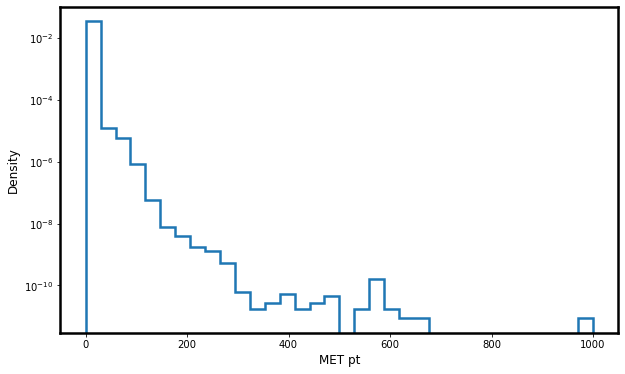

In [47]:
max_pt=1000
bins = np.linspace(0, max_pt, 35)

MET_pt = np.clip(datasets['EB_test']['HLT_data'][:, -3], a_min=0, a_max=max_pt)
weights = datasets['EB_test']['weights']


plt.figure(figsize=(10, 6))
plt.hist(MET_pt, bins=bins, density=True, histtype='step', linewidth=2.5, fill=False, weights=weights)


plt.xlabel('MET pt', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.yscale('log')
plt.show()

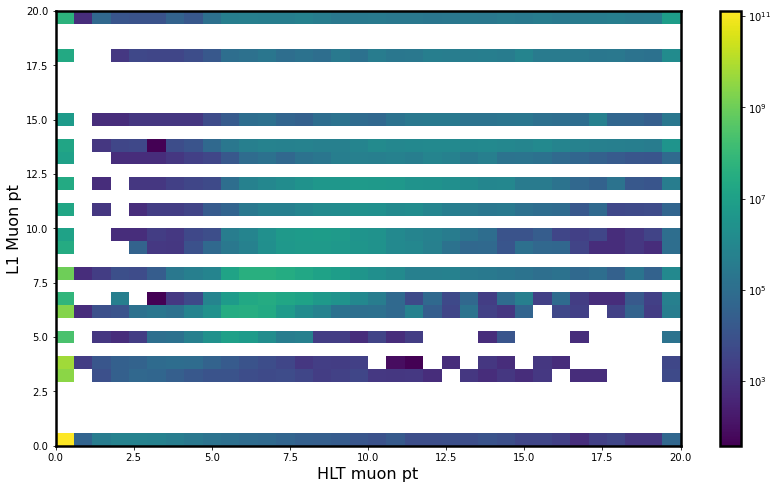

In [46]:
# 2d hist comparing HLT to L1 muon pt
xbins = np.linspace(0, 20, 35)
ybins = np.linspace(0, 20, 35)

HLT_muon_pt = np.clip(datasets['EB_test']['HLT_data'][:, 27], a_min=0, a_max=20)
L1_muon_pt = datasets['EB_test']['L1_data'][:, 27] * 1000
weights = datasets['EB_test']['weights']


plt.figure(figsize=(14, 8))
plt.hist2d(HLT_muon_pt, L1_muon_pt, bins=[xbins, ybins], cmap='viridis', norm=matplotlib.colors.LogNorm(), weights=weights)
plt.colorbar()
plt.xlabel(f'HLT muon pt', fontsize=16)
plt.ylabel(f'L1 Muon pt', fontsize=16)
plt.show()

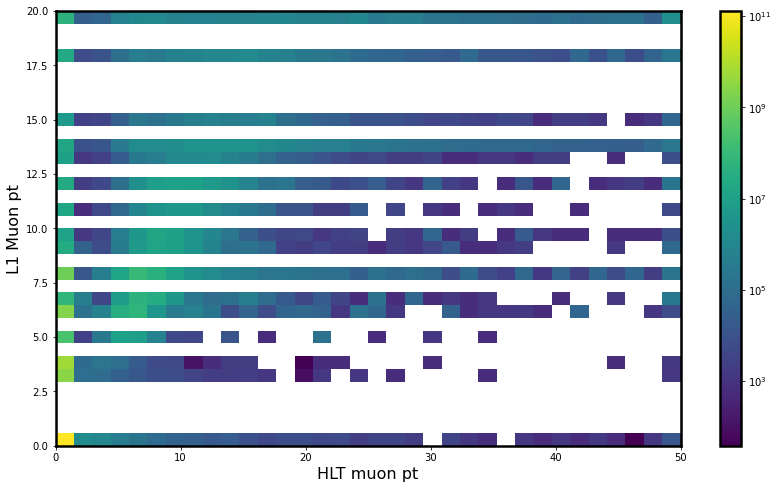

In [41]:
# 2d hist comparing HLT to L1 muon pt
xbins = np.linspace(0, 50, 35)
ybins = np.linspace(0, 20, 35)

HLT_muon_pt = np.clip(datasets['EB_test']['HLT_data'][:, 27], a_min=0, a_max=50)
L1_muon_pt = datasets['EB_test']['L1_data'][:, 27] * 1000
weights = datasets['EB_test']['weights']


plt.figure(figsize=(14, 8))
plt.hist2d(HLT_muon_pt, L1_muon_pt, bins=[xbins, ybins], cmap='viridis', norm=matplotlib.colors.LogNorm(), weights=weights)
plt.colorbar()
plt.xlabel(f'HLT muon pt', fontsize=16)
plt.ylabel(f'L1 Muon pt', fontsize=16)
plt.show()

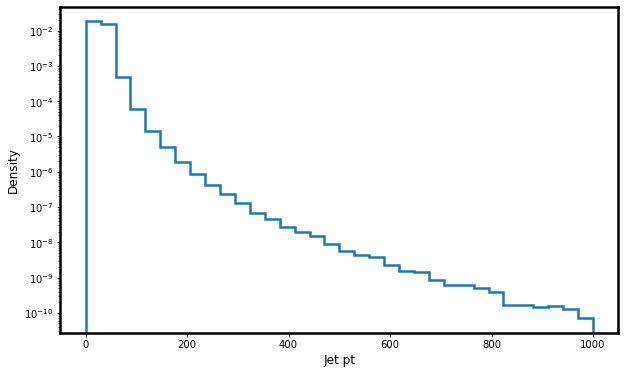

In [22]:
bins = np.linspace(0, 1000, 35)

leading_jet_pt = datasets['EB_test']['HLT_data'][:, 0]
weights = datasets['EB_test']['weights']


plt.figure(figsize=(10, 6))
plt.hist(leading_jet_pt, bins=bins, density=True, histtype='step', linewidth=2.5, fill=False, weights=weights)


plt.xlabel('Jet pt', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.yscale('log')
plt.show()

### Latent space of trial 132

In [2]:
training_info = {
    "save_path": "/eos/home-m/mmcohen/ad_trigger_development/trained_models/trial_132", 
    "dropout_p": 0.1, 
    "L2_reg_coupling": 0.01, 
    "latent_dim": 4, 
    "large_network": False, 
    "num_trainings": 10, 
    "training_weights": True, 
    "obj_type": "HLT", 
    "overlap_removal": False,
    "duplicate_removal": False
}

data_info = {
    "train_data_scheme": "topo2A_train", 
    "pt_normalization_type": "global_division", 
    "L1AD_rate": 1000, 
    "pt_thresholds": [50, 30, 30, 30], 
    "pt_scale_factor": 0.05, 
    "comments": "back to normal AE, with nnMET this time. retry same settings from trial 125"
}
datasets, region_counts = ef.load_and_inference(training_info, data_info, tags=['EB_test'], save_version=5)

Loaded EB_473255 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/EB_473255.h5
Loaded EB_475321 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/EB_475321.h5
Loaded EB_482596 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/EB_482596.h5
Loaded HLT_noalg_eb_L1All from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/HLT_noalg_eb_L1All.h5
Loaded mc23e_ChiPlusChiMinus100_99_0p3ns from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/mc23e_ChiPlusChiMinus100_99_0p3ns.h5
Loaded mc23e_ChiPlusChiMinus500_40_10ns from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/mc23e_ChiPlusChiMinus500_40_10ns.h5
Loaded mc23e_HAHMggf from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/mc23e_HAHMggf.h5
Loaded mc23e_HNLeemu from /eos/ho

/cvmfs/sft.cern.ch/lcg/views/LCG_106a_cuda/x86_64-el9-gcc11-opt/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 78 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


l1Seeded:::
HLTAD_pure_rate: 9.910051606036044
HLTAD_total_rate: 49.367144463143084
HLTAD_threshold: 8.653624534606934



2025-03-07 03:49:01.553468: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-07 03:49:01.614958: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-07 03:49:01.615322: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

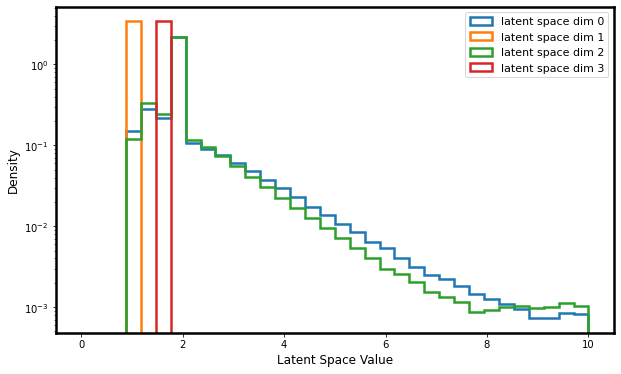

In [3]:
bins = np.linspace(0, 10, 35)

latent_reps = datasets['EB_test']['z']

plt.figure(figsize=(10, 6))
for i in range(latent_reps.shape[1]):
    plt.hist(latent_reps[:, i], bins=bins, label=f'latent space dim {i}', density=True, histtype='step', linewidth=2.5, fill=False)


plt.xlabel('Latent Space Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=11)
plt.yscale('log')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


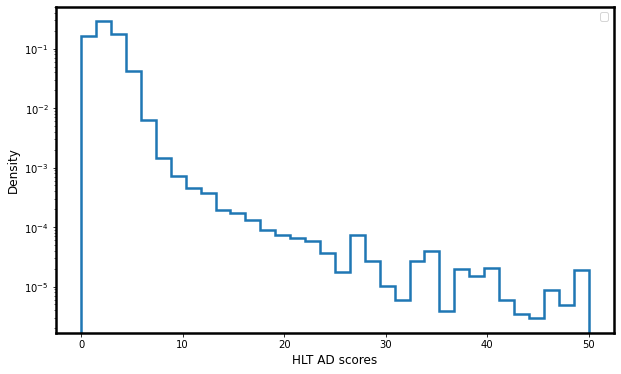

In [16]:
bins = np.linspace(0, 50, 35)

seed_mask = np.array(['B' in rl for rl in datasets['EB_test']['region_labels']]) | np.array(['C' in rl for rl in datasets['EB_test']['region_labels']])

AD_scores = datasets['EB_test']['HLT_AD_scores'][seed_mask]
weights=datasets['EB_test']['weights'][seed_mask]

plt.figure(figsize=(10, 6))

plt.hist(AD_scores, bins=bins, density=True, histtype='step', linewidth=2.5, fill=False, weights=weights)


plt.xlabel('HLT AD scores', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=11)
plt.yscale('log')
plt.show()

In [21]:
pass_mask = np.array(['E' in rl for rl in datasets['EB_test']['region_labels']]) | np.array(['F' in rl for rl in datasets['EB_test']['region_labels']])

print(2000 * np.sum(datasets['EB_test']['weights'][pass_mask]) / np.sum(weights))

8.650931773883054


In [15]:
print(datasets['EB_test']['region_labels'][0:5])
seed_mask=np.array(['B' in rl for rl in datasets['EB_test']['region_labels']])
print(seed_mask[0:5])

['A', 'A', 'A', 'A', 'A']
[False False False False False]


### Look at latent space of trial 135

In [2]:
training_info ={
    "save_path": "/eos/home-m/mmcohen/ad_trigger_development/trained_models/trial_135", 
    "dropout_p": 0.1, 
    "L2_reg_coupling": 0.01, 
    "latent_dim": 4, 
    "large_network": True,
    "num_trainings": 10, 
    "training_weights": True, 
    "obj_type": "HLT", 
    "overlap_removal": False,
    "duplicate_removal": False
}

data_info = {
    "train_data_scheme": "topo2A_train", 
    "pt_normalization_type": "global_division", 
    "L1AD_rate": 1000, 
    "pt_thresholds": [50, 30, 30, 30], 
    "pt_scale_factor": 0.05, 
    "comments": 
    ""
}

datasets, region_counts = ef.load_and_inference(training_info, data_info, tags=['EB_test'], save_version=2)

Loaded EB_473255 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/EB_473255.h5
Loaded EB_475321 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/EB_475321.h5
Loaded EB_482596 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/EB_482596.h5
Loaded HLT_noalg_eb_L1All from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/HLT_noalg_eb_L1All.h5
Loaded mc23e_ChiPlusChiMinus100_99_0p3ns from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/mc23e_ChiPlusChiMinus100_99_0p3ns.h5
Loaded mc23e_ChiPlusChiMinus500_40_10ns from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/mc23e_ChiPlusChiMinus500_40_10ns.h5
Loaded mc23e_HAHMggf from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/mc23e_HAHMggf.h5
Loaded mc23e_HNLeemu from /eos/ho

/cvmfs/sft.cern.ch/lcg/views/LCG_106a_cuda/x86_64-el9-gcc11-opt/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 78 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


l1Seeded:::
HLTAD_pure_rate: 9.894838723278164
HLTAD_total_rate: 51.63718327449187
HLTAD_threshold: 10.011319160461426



2025-03-07 07:27:45.188982: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-07 07:27:45.249342: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-07 07:27:45.249782: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

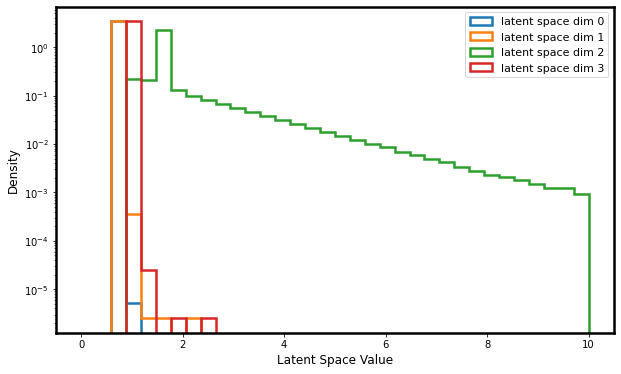

In [3]:
bins = np.linspace(0, 10, 35)

latent_reps = datasets['EB_test']['z']

plt.figure(figsize=(10, 6))
for i in range(latent_reps.shape[1]):
    plt.hist(latent_reps[:, i], bins=bins, label=f'latent space dim {i}', density=True, histtype='step', linewidth=2.5, fill=False)


plt.xlabel('Latent Space Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=11)
plt.yscale('log')
plt.show()

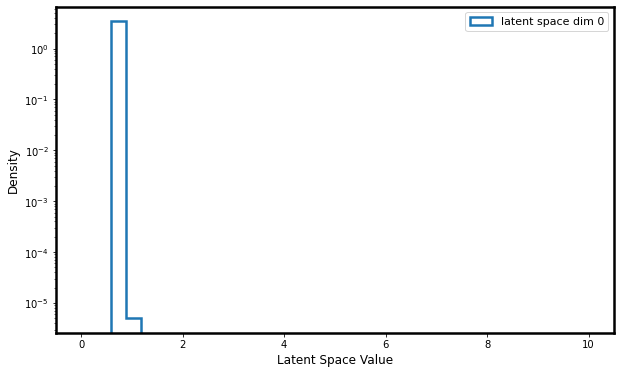

In [4]:
bins = np.linspace(0, 10, 35)

latent_reps = datasets['EB_test']['z']

plt.figure(figsize=(10, 6))
plt.hist(latent_reps[:, 0], bins=bins, label=f'latent space dim {0}', density=True, histtype='step', linewidth=2.5, fill=False)


plt.xlabel('Latent Space Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=11)
plt.yscale('log')
plt.show()

### Look at latent space of run 134

In [2]:
data_info = {
    "train_data_scheme": "topo2A_train", 
    "pt_normalization_type": "global_division", 
    "L1AD_rate": 1000, 
    "pt_thresholds": [50, 30, 30, 30], 
    "pt_scale_factor": 0.05,
    "comments": "nnMET, rety settings from 125 with latent dim of 2"
}

training_info = {
    "save_path": "/eos/home-m/mmcohen/ad_trigger_development/trained_models/trial_134", 
    "dropout_p": 0.1, 
    "L2_reg_coupling": 0.01, 
    "latent_dim": 2, 
    "large_network": False, 
    "num_trainings": 10, 
    "training_weights": True,
    "obj_type": 'HLT',
    "overlap_removal": False,
    "duplicate_removal": False
}

datasets, region_counts = ef.load_and_inference(training_info, data_info, tags=['EB_test'], save_version=0)

Loaded EB_473255 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/EB_473255.h5
Loaded EB_475321 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/EB_475321.h5
Loaded EB_482596 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/EB_482596.h5
Loaded HLT_noalg_eb_L1All from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/HLT_noalg_eb_L1All.h5
Loaded mc23e_ChiPlusChiMinus100_99_0p3ns from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/mc23e_ChiPlusChiMinus100_99_0p3ns.h5
Loaded mc23e_ChiPlusChiMinus500_40_10ns from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/mc23e_ChiPlusChiMinus500_40_10ns.h5
Loaded mc23e_HAHMggf from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/mc23e_HAHMggf.h5
Loaded mc23e_HNLeemu from /eos/ho

/cvmfs/sft.cern.ch/lcg/views/LCG_106a_cuda/x86_64-el9-gcc11-opt/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 78 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


l1Seeded:::
HLTAD_pure_rate: 9.894838723278164
HLTAD_total_rate: 56.33561880700648
HLTAD_threshold: 10.542509078979492



2025-03-06 21:27:54.993270: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-06 21:27:55.056627: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-06 21:27:55.057011: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

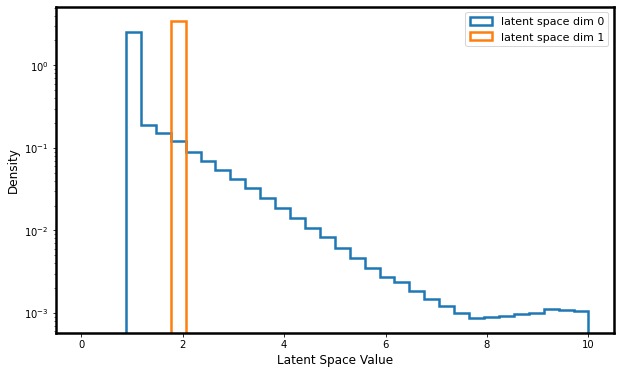

In [3]:
bins = np.linspace(0, 10, 35)

latent_reps = datasets['EB_test']['z']

plt.figure(figsize=(10, 6))
for i in range(latent_reps.shape[1]):
    plt.hist(latent_reps[:, i], bins=bins, label=f'latent space dim {i}', density=True, histtype='step', linewidth=2.5, fill=False)


plt.xlabel('Latent Space Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=11)
plt.yscale('log')
plt.show()

### test out OR and DR

In [2]:
data_info = {
    "train_data_scheme": "topo2A_train", 
    "pt_normalization_type": "global_division", 
    "L1AD_rate": 1000, 
    "pt_thresholds": [0, 0, 0, 0], 
    "pt_scale_factor": 0.05,
    "comments": ""
}

In [3]:
datasets = ef.load_and_preprocess_and_preprocess(data_info=data_info, overlap_removal=False, duplicate_removal=True, obj_type='HLT', tag='synthetic_events')

Loaded EB_473255 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/EB_473255.h5
Loaded EB_475321 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/EB_475321.h5
Loaded EB_482596 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/EB_482596.h5
Loaded HLT_noalg_eb_L1All from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/HLT_noalg_eb_L1All.h5
Loaded mc23e_ChiPlusChiMinus100_99_0p3ns from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/mc23e_ChiPlusChiMinus100_99_0p3ns.h5
Loaded mc23e_ChiPlusChiMinus500_40_10ns from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/mc23e_ChiPlusChiMinus500_40_10ns.h5
Loaded mc23e_HAHMggf from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/mc23e_HAHMggf.h5
Loaded mc23e_HNLeemu from /eos/ho

In [4]:
print(datasets['synthetic_events']['HLT_data'])
print()
print(datasets['synthetic_events']['HLT_preprocessed_data'])

[[ 5.00e+01  3.10e-01  0.00e+00  6.00e+01  1.00e+00  1.00e+00  5.50e+01
  -5.00e-01  2.00e+00  5.20e+01  0.00e+00 -1.00e+00  5.30e+01  8.00e-01
   8.00e-01  5.40e+01 -8.00e-01 -8.00e-01  1.00e+01  5.00e-01  0.00e+00
   1.20e+01  2.00e+00  1.00e+00  1.10e+01 -1.00e+00  5.00e-01  8.00e+00
   5.50e-01  5.00e-02  9.00e+00  3.00e+00  2.00e+00  1.00e+01 -1.50e+00
   4.00e-01  1.50e+01  5.20e-01 -5.00e-02  1.60e+01  3.05e+00  2.05e+00
   1.40e+01 -2.00e+00  0.00e+00  3.00e+01  0.00e+00  0.00e+00]
 [ 5.00e+01 -1.00e+00 -1.00e+00  5.50e+01 -1.50e+00 -1.50e+00  6.00e+01
  -2.00e+00 -2.00e+00  6.50e+01 -2.50e+00 -2.50e+00  7.00e+01 -3.00e+00
  -3.00e+00  7.50e+01 -3.50e+00 -3.50e+00  1.00e+01  1.00e+00  1.00e+00
   1.10e+01  1.50e+00  1.50e+00  1.20e+01  2.00e+00  2.00e+00  8.00e+00
   3.00e+00  3.00e+00  9.00e+00  3.50e+00  3.50e+00  1.00e+01  4.00e+00
   4.00e+00  1.50e+01  5.00e+00  5.00e+00  1.60e+01  5.50e+00  5.50e+00
   1.70e+01  6.00e+00  6.00e+00  3.00e+01  0.00e+00  0.00e+00]
 [ 5.00e+0

In [ ]:
# Success! O.R. is working correctly

### Look at the latent space of trial 125

In [3]:
training_info ={
    "save_path": "/eos/home-m/mmcohen/ad_trigger_development/trained_models/trial_125", 
    "dropout_p": 0.1, 
    "L2_reg_coupling": 0.01, 
    "latent_dim": 4, 
    "large_network": True,
    "num_trainings": 10, 
    "training_weights": True, 
    "obj_type": "HLT", 
    "overlap_removal": False,
    "duplicate_removal": False
}

data_info = {
    "train_data_scheme": "topo2A_train", 
    "pt_normalization_type": "global_division", 
    "L1AD_rate": 1000, 
    "pt_thresholds": [50, 30, 30, 30], 
    "pt_scale_factor": 0.05, 
    "comments": 
    "Retry training from run 113 to see if I get similar results"
}

datasets, region_counts = ef.load_and_inference(training_info, data_info, tags=['EB_test'], save_version=1)

Loaded EB_473255 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/EB_473255.h5
Loaded EB_475321 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/EB_475321.h5
Loaded EB_482596 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/EB_482596.h5
Loaded HLT_noalg_eb_L1All from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/HLT_noalg_eb_L1All.h5
Loaded mc23e_ChiPlusChiMinus100_99_0p3ns from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/mc23e_ChiPlusChiMinus100_99_0p3ns.h5
Loaded mc23e_ChiPlusChiMinus500_40_10ns from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/mc23e_ChiPlusChiMinus500_40_10ns.h5
Loaded mc23e_HAHMggf from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/03-03-2025/mc23e_HAHMggf.h5
Loaded mc23e_HNLeemu from /eos/ho

/cvmfs/sft.cern.ch/lcg/views/LCG_106a_cuda/x86_64-el9-gcc11-opt/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 78 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


l1Seeded:::
HLTAD_pure_rate: 9.89065571403878
HLTAD_total_rate: 43.495468474322216
HLTAD_threshold: 12.001483917236328



2025-03-06 15:30:52.694508: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-06 15:30:53.106118: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-06 15:30:53.106516: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

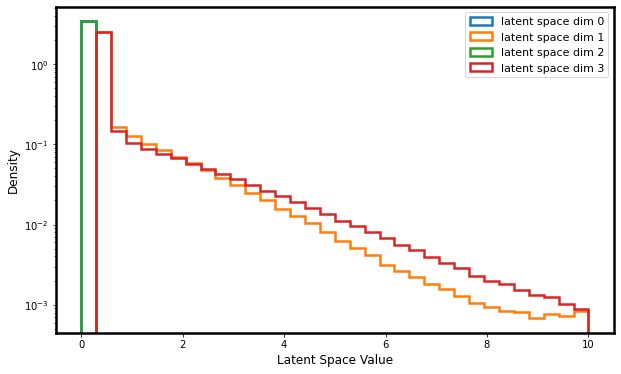

In [4]:
bins = np.linspace(0, 10, 35)

latent_reps = datasets['EB_test']['z']

plt.figure(figsize=(10, 6))
for i in range(latent_reps.shape[1]):
    plt.hist(latent_reps[:, i], bins=bins, label=f'latent space dim {i}', density=True, histtype='step', linewidth=2.5, fill=False)


plt.xlabel('Latent Space Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=11)
plt.yscale('log')
plt.show()

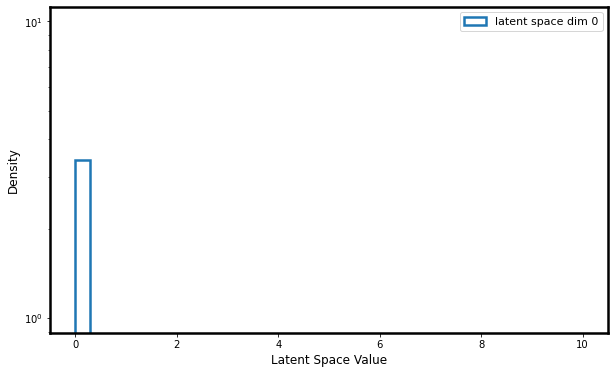

In [7]:
bins = np.linspace(0, 10, 35)

latent_reps = datasets['EB_test']['z']

plt.figure(figsize=(10, 6))
plt.hist(latent_reps[:, 0], bins=bins, label=f'latent space dim {0}', density=True, histtype='step', linewidth=2.5, fill=False)


plt.xlabel('Latent Space Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=11)
plt.yscale('log')
plt.show()

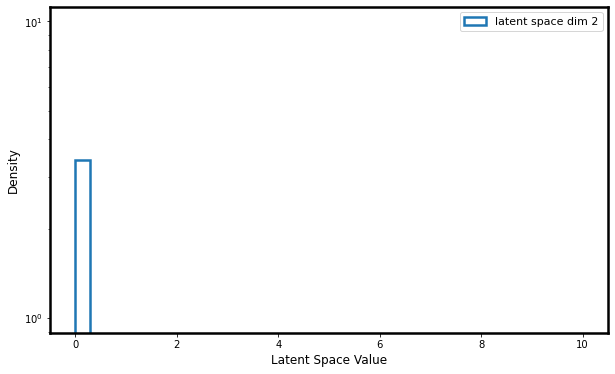

In [9]:
bins = np.linspace(0, 10, 35)

latent_reps = datasets['EB_test']['z']

plt.figure(figsize=(10, 6))
plt.hist(latent_reps[:, 2], bins=bins, label=f'latent space dim {2}', density=True, histtype='step', linewidth=2.5, fill=False)


plt.xlabel('Latent Space Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=11)
plt.yscale('log')
plt.show()

In [7]:
idx = 0
for idx in range(5):
    print(datasets['EB_test']['HLT_preprocessed_data'][idx])
    print(datasets['EB_test']['z'][idx])
    print()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.3249437 1.2994556 1.377295  1.3378843]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.3249437 1.2994556 1.377295  1.3378843]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.3249437 1.2994556 1.377295  1.3378843]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.3249437 1.2994556 1.377295  1.3378843]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.3249437 1.2994556 1.377295  1.3378843]



### Plots of AD score for events with jets above and below the threshold

In [2]:
training_info ={
    "save_path": "/eos/home-m/mmcohen/ad_trigger_development/trained_models/trial_125", 
    "dropout_p": 0.1, 
    "L2_reg_coupling": 0.01, 
    "latent_dim": 4, 
    "large_network": True,
    "num_trainings": 10, 
    "training_weights": True, 
    "obj_type": "HLT", 
    "overlap_removal": False
}

data_info = {
    "train_data_scheme": "topo2A_train", 
    "pt_normalization_type": "global_division", 
    "L1AD_rate": 1000, 
    "pt_thresholds": [50, 30, 30, 30], 
    "pt_scale_factor": 0.05, 
    "comments": 
    "Retry training from run 113 to see if I get similar results"
}

datasets, region_counts = ef.load_and_inference(training_info, data_info)

Loaded A14N23LO from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/A14N23LO.h5
Loaded EB_473255 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/EB_473255.h5
Loaded EB_475321 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/EB_475321.h5
Loaded EB_482596 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/EB_482596.h5
Loaded HAHMggfZdZd2l2nu from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/HAHMggfZdZd2l2nu.h5
Loaded HHbbttHadHad from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/HHbbttHadHad.h5
Loaded HLT_noalg_eb_L1All from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/HLT_noalg_eb_L1All.h5
Loaded ZZ4lep from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/ZZ4lep.h5
Lo

/cvmfs/sft.cern.ch/lcg/views/LCG_106a_cuda/x86_64-el9-gcc11-opt/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 78 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


l1Seeded:::
HLTAD_pure_rate: 9.919936778714469
HLTAD_total_rate: 82.92916439868625
HLTAD_threshold: 23.372474670410156



2025-02-26 19:51:37.206362: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-26 19:51:37.278261: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-26 19:51:37.278571: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

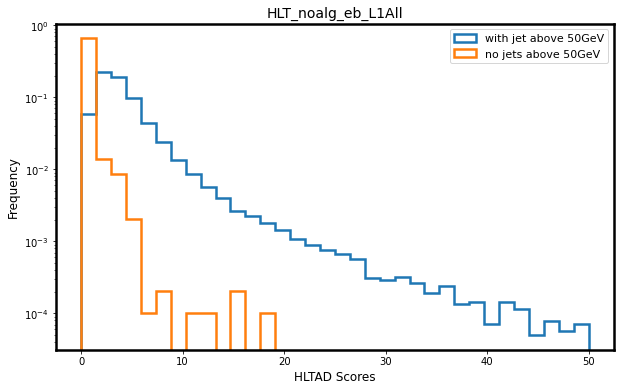

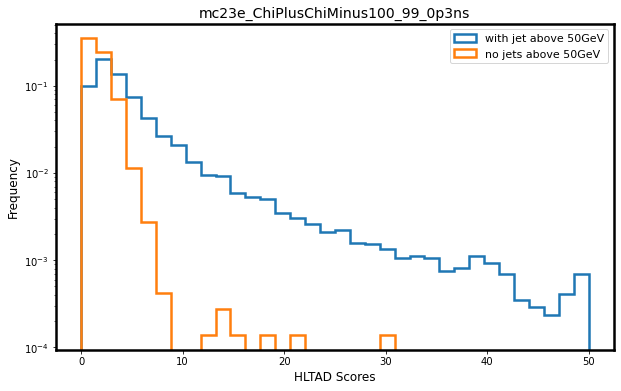

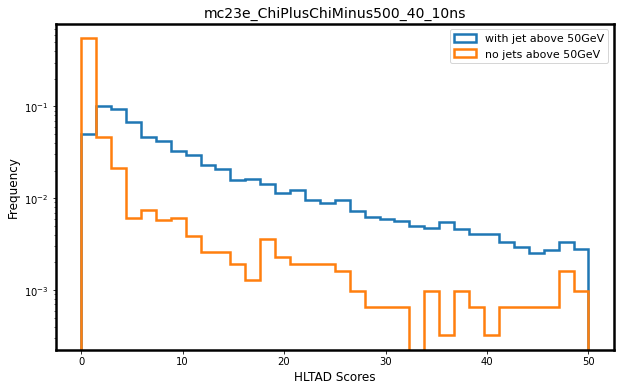

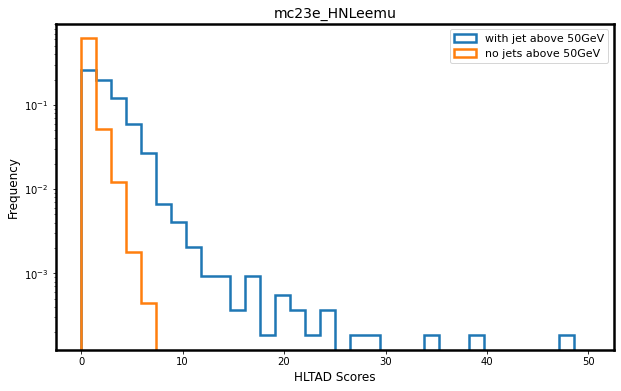

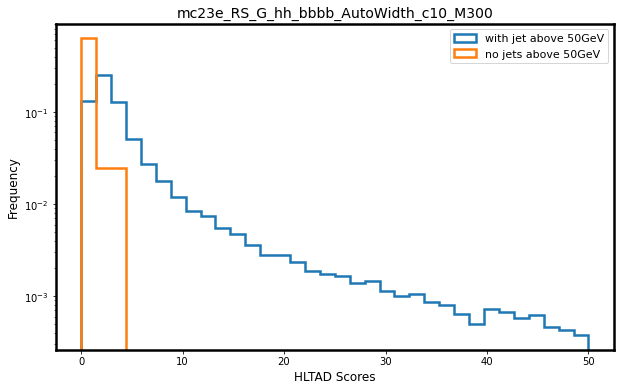

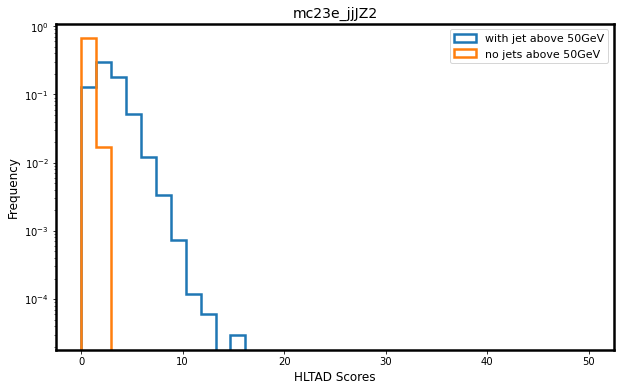

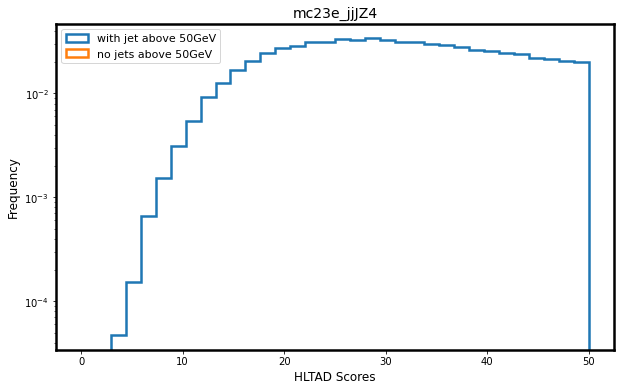

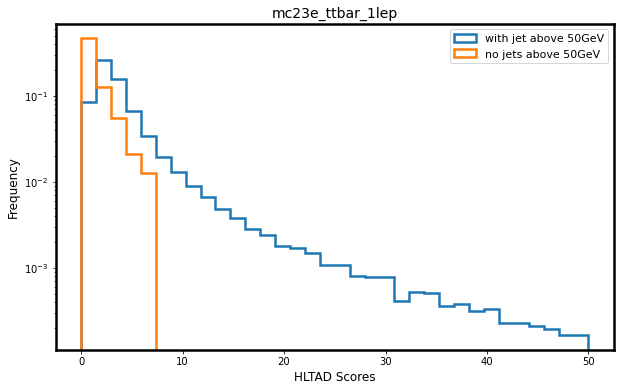

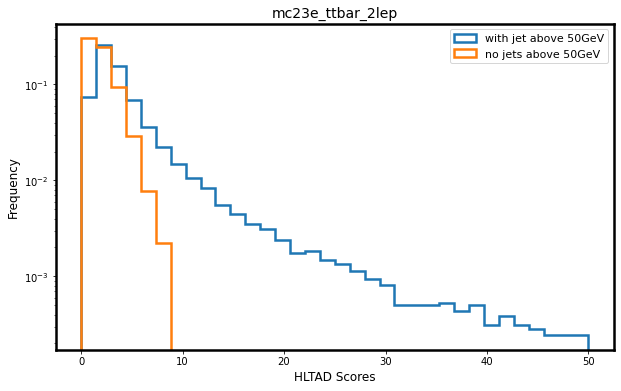

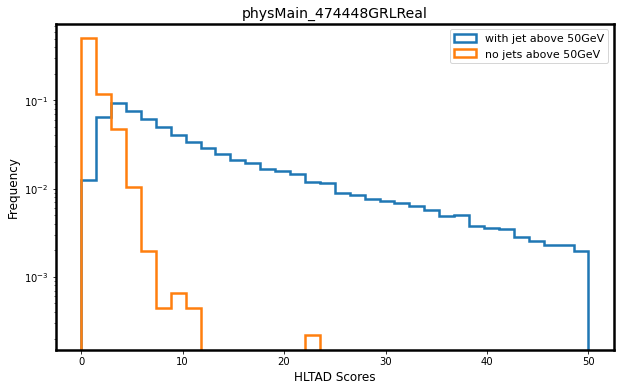

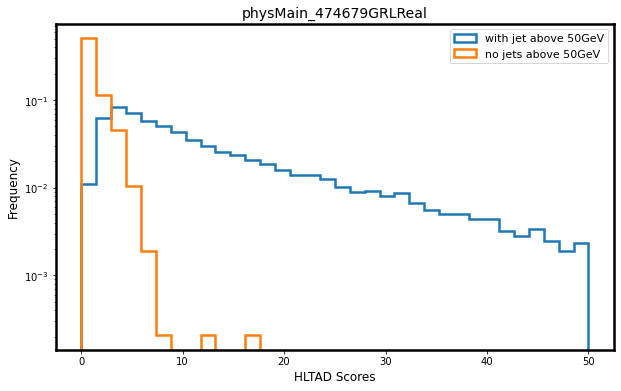

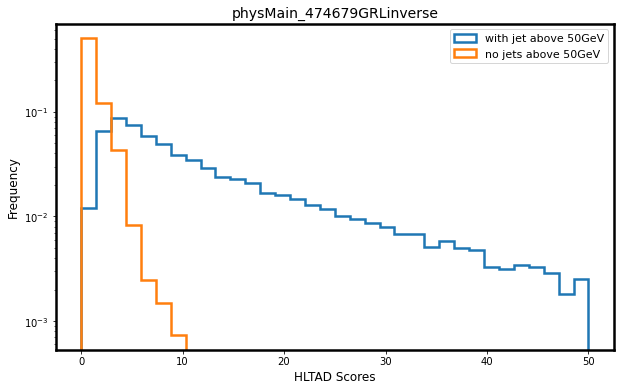

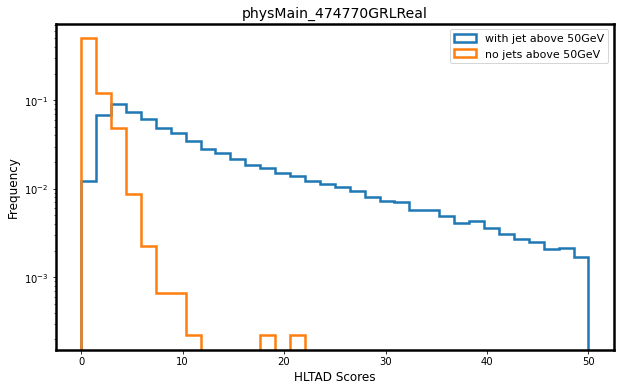

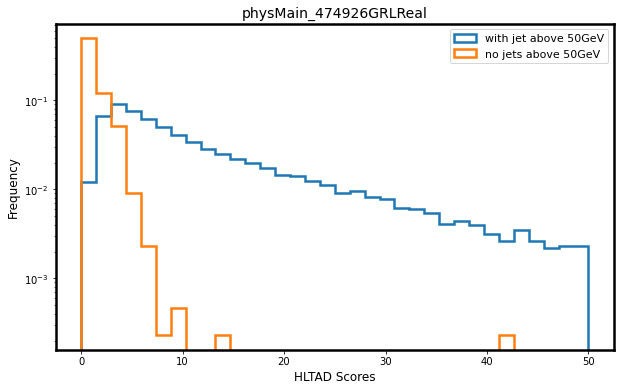

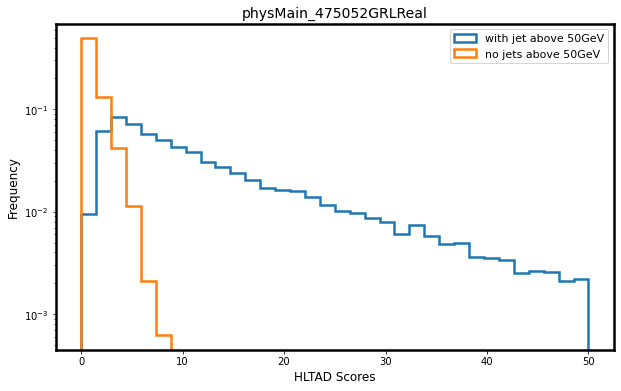

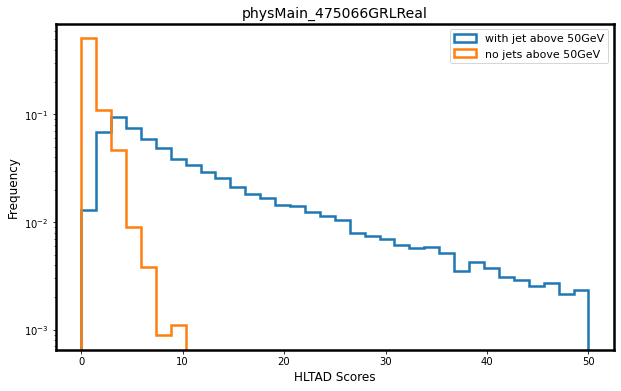

/tmp/ipykernel_1223/3199657829.py:21: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


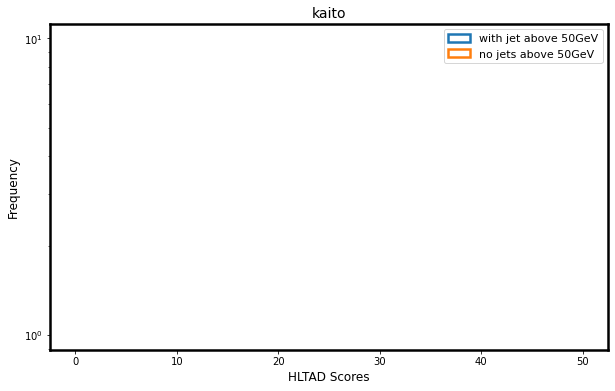

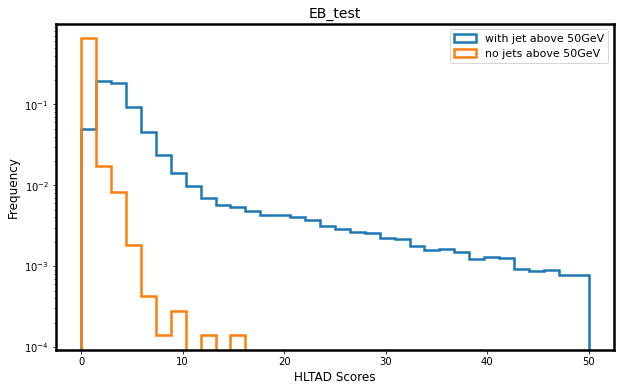

In [9]:
bins=np.linspace(0, 50, 35)

for tag, data_dict in datasets.items():
    if 'region_labels' not in data_dict: continue
    seed_mask = np.array(['B' in label or 'C' in label for label in data_dict['region_labels']])
    with_jet_mask = data_dict['HLT_preprocessed_data'][:, 0] > 0 # first jet is nonzero after preprocessing, which means that the jet had > 50GeV before preprocessing
    
    AD_scores_with_jet = data_dict['HLT_AD_scores'][seed_mask & with_jet_mask]
    AD_scores_without_jet = data_dict['HLT_AD_scores'][seed_mask & ~with_jet_mask]

    plt.figure(figsize=(10, 6))
    plt.hist(AD_scores_with_jet, bins=bins, label=f'with jet above 50GeV', 
                 density=True, histtype='step', linewidth=2.5, fill=False)
    plt.hist(AD_scores_without_jet, bins=bins, label=f'no jets above 50GeV', 
                 density=True, histtype='step', linewidth=2.5, fill=False)
    
    plt.title(f'{tag}', fontsize=14)
    plt.xlabel('HLTAD Scores', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(fontsize=11)
    plt.yscale('log')
    plt.show()

### Examine VAE_GAN

In [2]:
data_info = {
    "train_data_scheme": "topo2A_train", 
    "pt_normalization_type": "global_division", 
    "L1AD_rate": 1000, 
    "pt_thresholds": [50, 30, 30, 30], 
    "pt_scale_factor": 0.05,
    "comments": "VAE_GAN"
}

training_info = {
    "save_path": "/eos/home-m/mmcohen/ad_trigger_development/trained_models/trial_128", 
    "dropout_p": 0.1, 
    "L2_reg_coupling": 0.01, 
    "latent_dim": 4, 
    "large_network": True, 
    "num_trainings": 4, 
    "training_weights": True,
    "obj_type": 'HLT',
    "overlap_removal": False
}

In [3]:
datasets, _ = gan_ef.load_and_inference(
    training_info=training_info,
    data_info=data_info,
    tags = ['EB_test', 'mc23e_RS_G_hh_bbbb_AutoWidth_c10_M300']
)

Loaded A14N23LO from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/A14N23LO.h5
Loaded EB_473255 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/EB_473255.h5
Loaded EB_475321 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/EB_475321.h5
Loaded EB_482596 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/EB_482596.h5
Loaded HAHMggfZdZd2l2nu from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/HAHMggfZdZd2l2nu.h5
Loaded HHbbttHadHad from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/HHbbttHadHad.h5
Loaded HLT_noalg_eb_L1All from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/HLT_noalg_eb_L1All.h5
Loaded ZZ4lep from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/ZZ4lep.h5
Lo

2025-02-21 21:30:11.990745: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-21 21:30:12.056369: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-21 21:30:12.056710: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

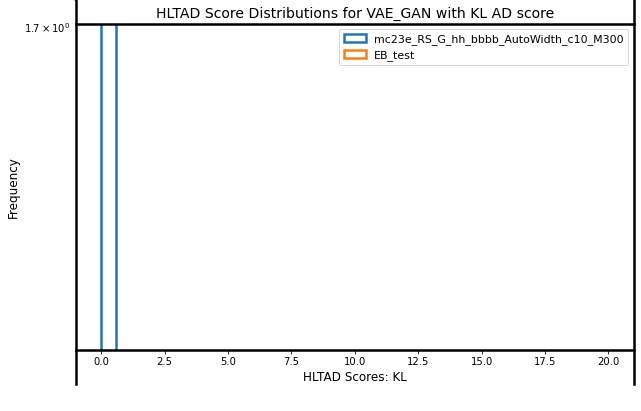

In [4]:
bins = np.linspace(0, 20, 35)
plt.figure(figsize=(10, 6))
for tag, data_dict in datasets.items():
    if 'HLT_AD_scores' not in data_dict: continue


    plt.hist(data_dict['HLT_AD_scores'], bins=bins, density=True, histtype='step', linewidth=2.5, fill=False, label=tag)
    
plt.title(f'HLTAD Score Distributions for VAE_GAN with KL AD score', fontsize=14)
plt.xlabel('HLTAD Scores: KL', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=11)
plt.yscale('log')
plt.show()

/cvmfs/sft.cern.ch/lcg/views/LCG_106a_cuda/x86_64-el9-gcc11-opt/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


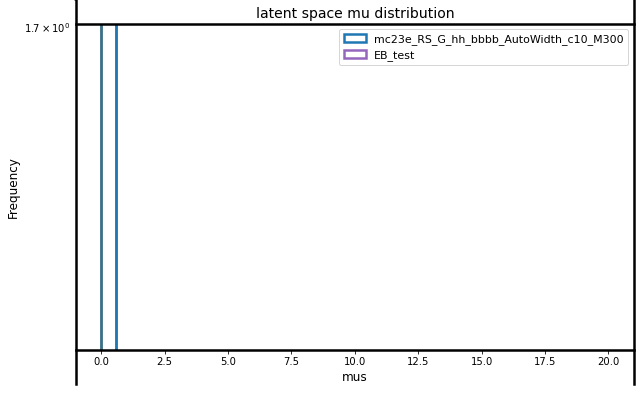

In [5]:
bins = np.linspace(0, 20, 35)
plt.figure(figsize=(10, 6))
for tag, data_dict in datasets.items():
    if 'HLT_AD_scores' not in data_dict: continue


    plt.hist(data_dict['mus'], bins=bins, density=True, histtype='step', linewidth=2.5, fill=False, label=tag)
    
plt.title(f'latent space mu distribution', fontsize=14)
plt.xlabel('mus', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=11)
plt.yscale('log')
plt.show()

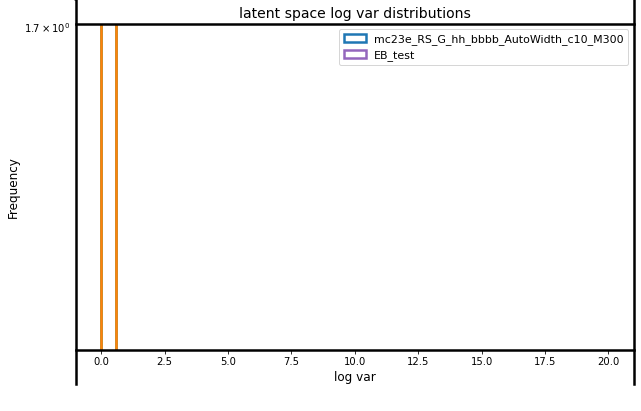

In [6]:
bins = np.linspace(0, 20, 35)
plt.figure(figsize=(10, 6))
for tag, data_dict in datasets.items():
    if 'HLT_AD_scores' not in data_dict: continue


    plt.hist(data_dict['log_vars'], bins=bins, density=True, histtype='step', linewidth=2.5, fill=False, label=tag)
    
plt.title(f'latent space log var distributions', fontsize=14)
plt.xlabel('log var', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=11)
plt.yscale('log')
plt.show()

### Study AD score distributions in different regions

In [2]:
data_info = {
    "train_data_scheme": "topo2A_train", 
    "pt_normalization_type": "global_division", 
    "L1AD_rate": 1000, 
    "pt_thresholds": [50, 30, 30, 30], 
    "pt_scale_factor": 0.05,
    "comments": "Retry training with overlap removal"
}

training_info = {
    "save_path": "/eos/home-m/mmcohen/ad_trigger_development/trained_models/trial_125", 
    "dropout_p": 0.1, 
    "L2_reg_coupling": 0.01, 
    "latent_dim": 4, 
    "large_network": True, 
    "num_trainings": 10, 
    "training_weights": True,
    "obj_type": 'HLT',
    "overlap_removal": False
}

datasets, region_counts = ef.load_and_inference(
    training_info=training_info,
    data_info=data_info,
    target_rate=10,
    L1AD_rate=1000,
    obj_type='HLT',
    save_version='1',
    tag='all'
)

Loaded A14N23LO from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/A14N23LO.h5
Loaded EB_473255 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/EB_473255.h5
Loaded EB_475321 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/EB_475321.h5
Loaded EB_482596 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/EB_482596.h5
Loaded HAHMggfZdZd2l2nu from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/HAHMggfZdZd2l2nu.h5
Loaded HHbbttHadHad from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/HHbbttHadHad.h5
Loaded HLT_noalg_eb_L1All from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/HLT_noalg_eb_L1All.h5
Loaded ZZ4lep from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/ZZ4lep.h5
Lo

/cvmfs/sft.cern.ch/lcg/views/LCG_106a_cuda/x86_64-el9-gcc11-opt/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 78 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


l1Seeded:::
HLTAD_pure_rate: 9.886472704799399
HLTAD_total_rate: 43.75702865614023
HLTAD_threshold: 11.60262393951416



2025-02-19 19:18:35.460411: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-19 19:18:35.535410: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-19 19:18:35.535725: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

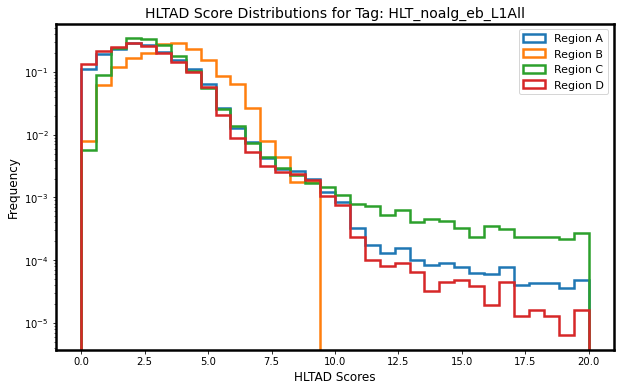

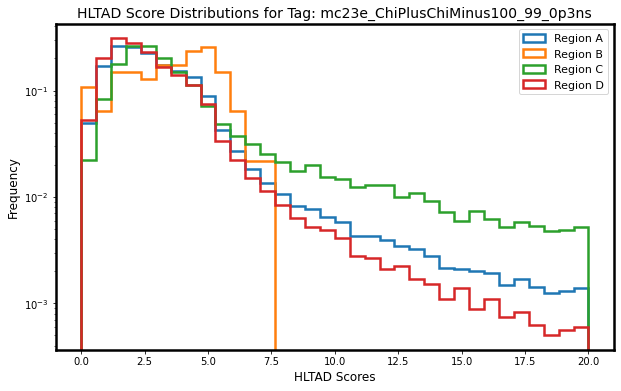

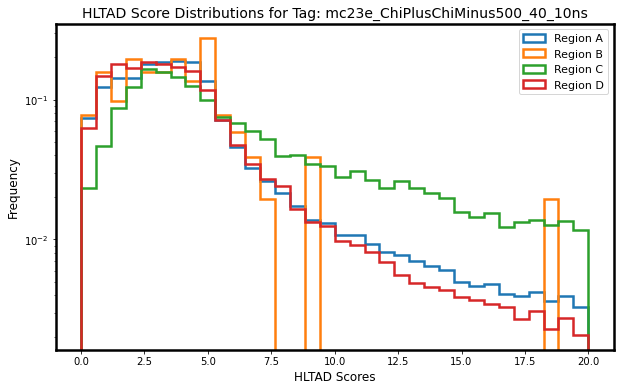

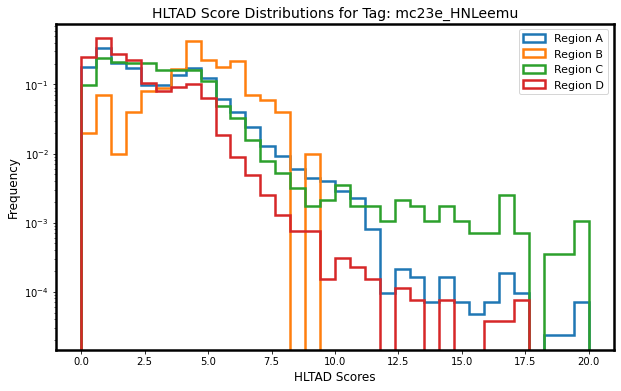

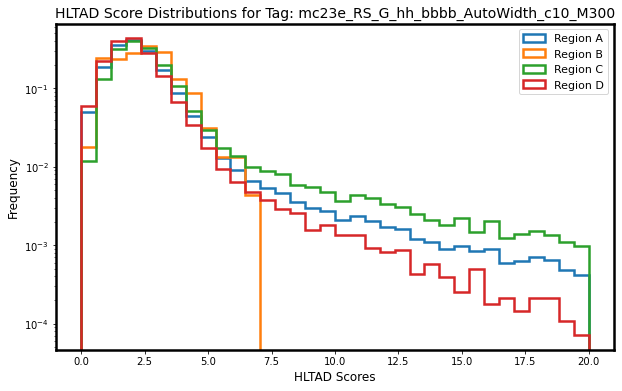

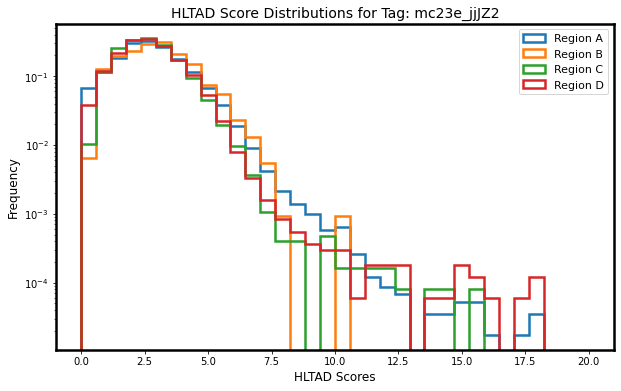

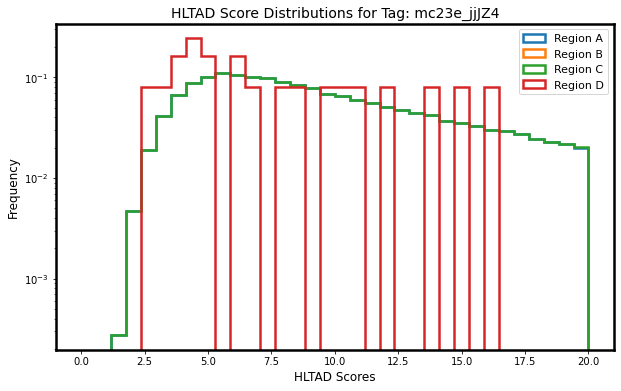

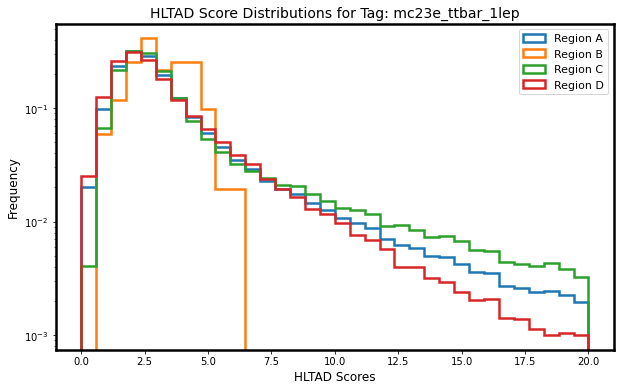

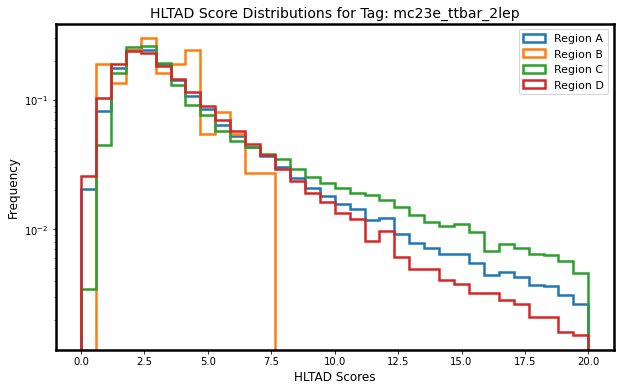

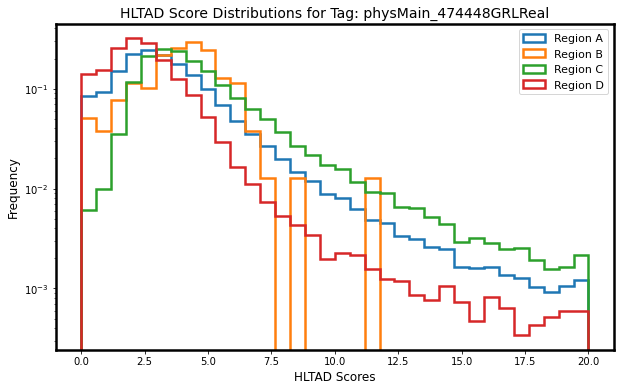

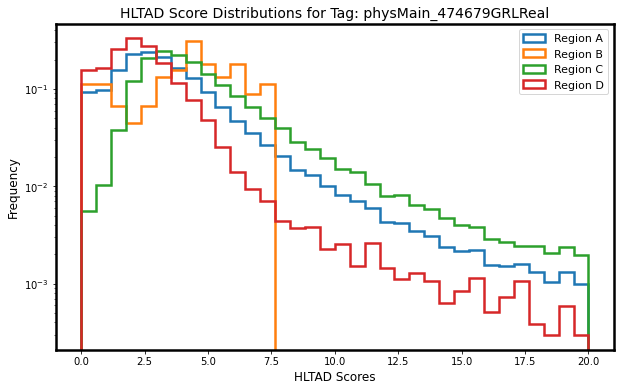

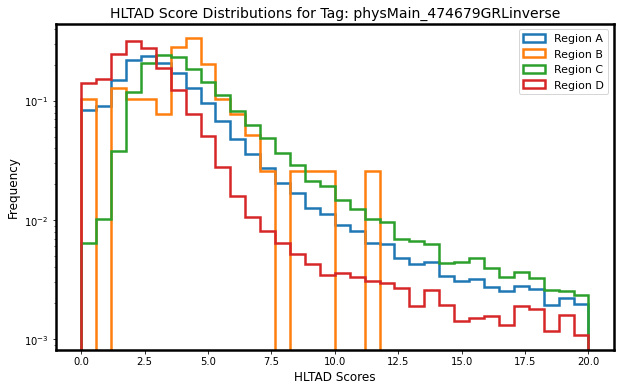

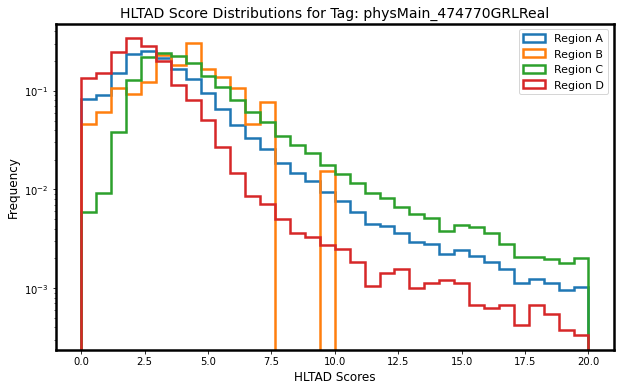

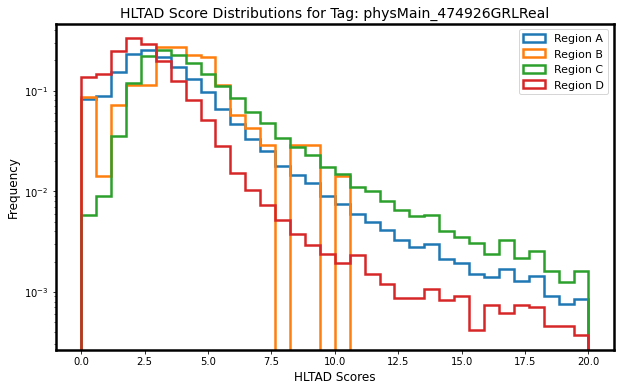

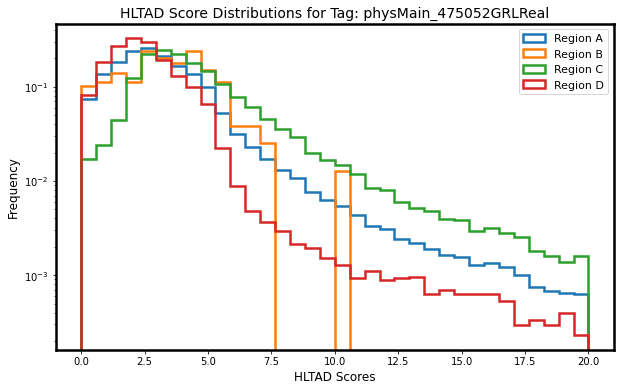

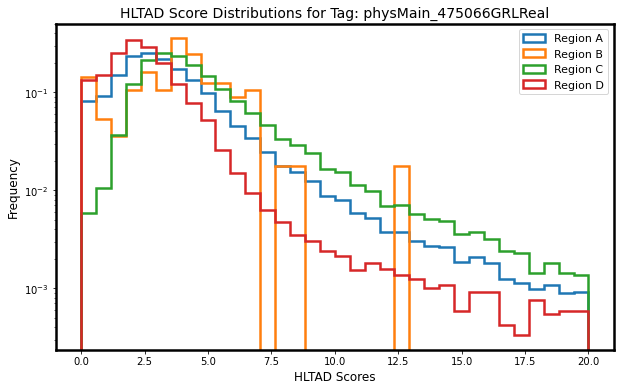

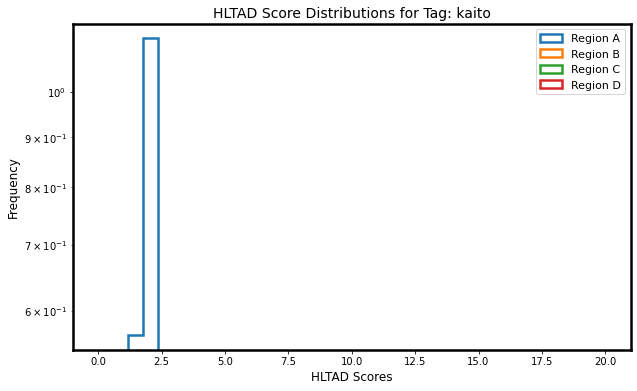

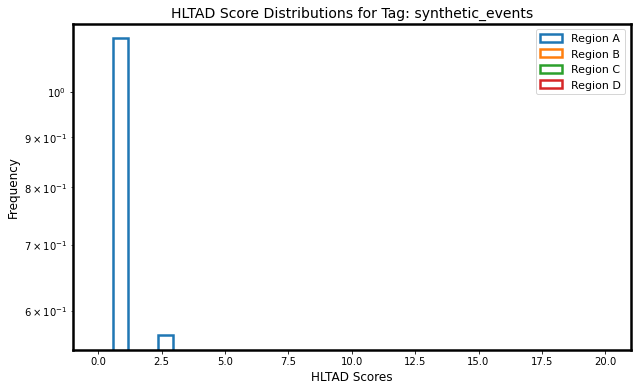

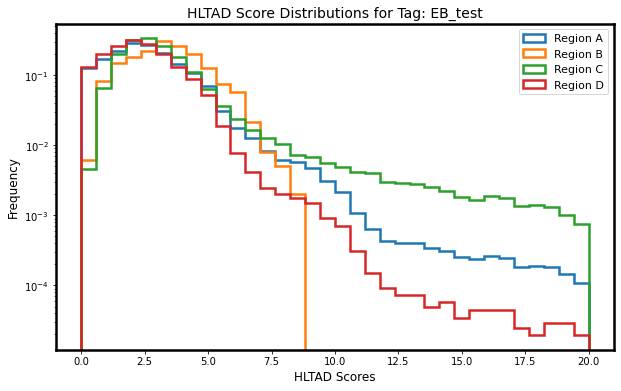

In [28]:
bins=np.linspace(0, 20, 35)
for tag, data_dict in datasets.items():

    if 'region_labels' not in data_dict: continue


    A_mask = ['A' in label for label in data_dict['region_labels']]
    B_mask = ['B' in label for label in data_dict['region_labels']]
    C_mask = ['C' in label for label in data_dict['region_labels']]
    D_mask = ['D' in label for label in data_dict['region_labels']]
    E_mask = ['E' in label for label in data_dict['region_labels']]
    F_mask = ['F' in label for label in data_dict['region_labels']]
    G_mask = ['G' in label for label in data_dict['region_labels']]

    A_scores = data_dict['HLT_AD_scores'][A_mask]
    B_scores = data_dict['HLT_AD_scores'][B_mask]
    C_scores = data_dict['HLT_AD_scores'][C_mask]
    D_scores = data_dict['HLT_AD_scores'][D_mask]
    E_scores = data_dict['HLT_AD_scores'][E_mask]
    F_scores = data_dict['HLT_AD_scores'][F_mask]
    G_scores = data_dict['HLT_AD_scores'][G_mask]


    regions = {
        'A': A_scores[A_scores>0],
        'B': B_scores[B_scores>0],
        'C': C_scores[C_scores>0],
        'D': D_scores[D_scores>0]
    }

    # Plot histograms for each region on the same plot
    plt.figure(figsize=(10, 6))
    for region, scores in regions.items():
        plt.hist(scores, bins=bins, label=f'Region {region}', 
                 density=True, histtype='step', linewidth=2.5, fill=False)
    
    plt.title(f'HLTAD Score Distributions for Tag: {tag}', fontsize=14)
    plt.xlabel('HLTAD Scores', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(fontsize=11)
    plt.yscale('log')
    plt.show()

HLT_noalg_eb_L1All


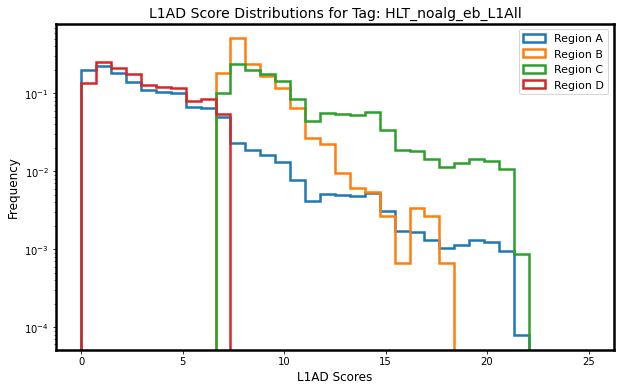

mc23e_ChiPlusChiMinus100_99_0p3ns


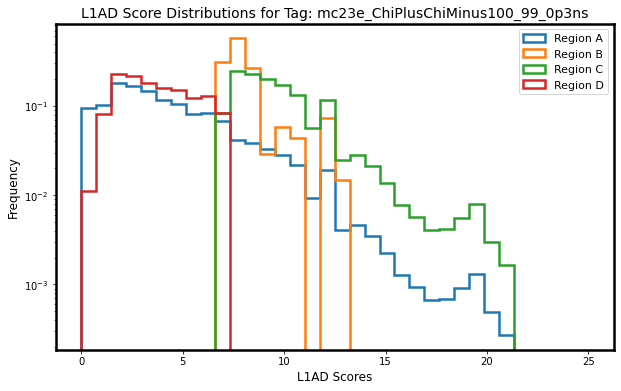

mc23e_ChiPlusChiMinus500_40_10ns


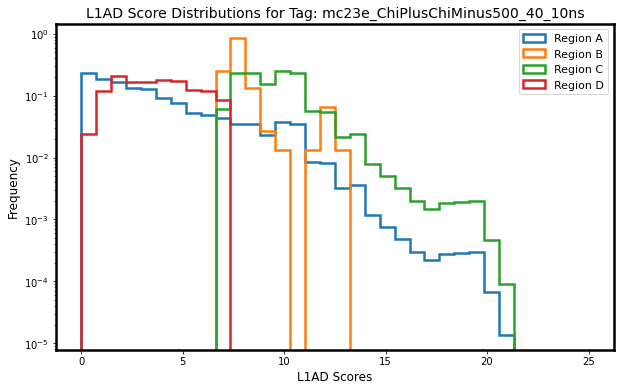

mc23e_HNLeemu


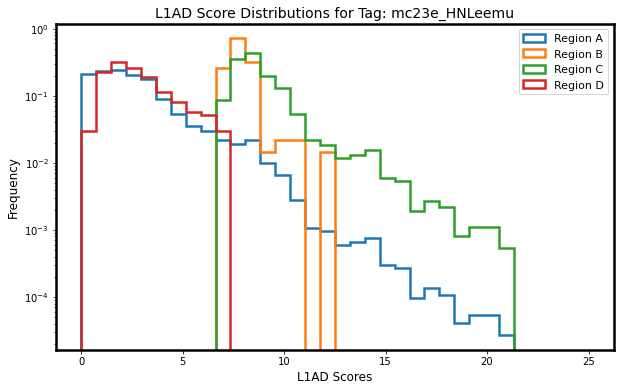

mc23e_RS_G_hh_bbbb_AutoWidth_c10_M300


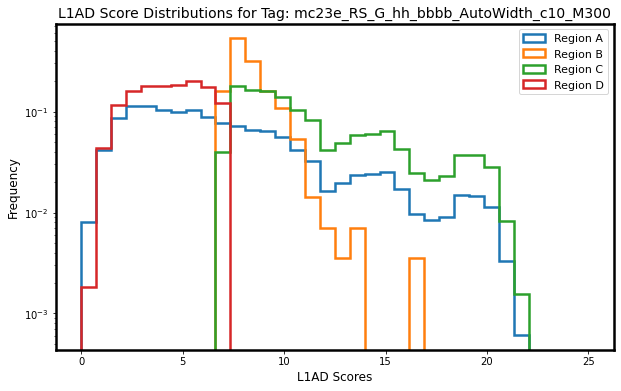

mc23e_jjJZ2


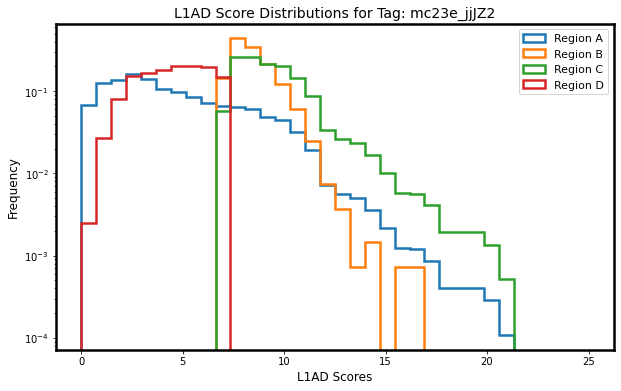

mc23e_jjJZ4


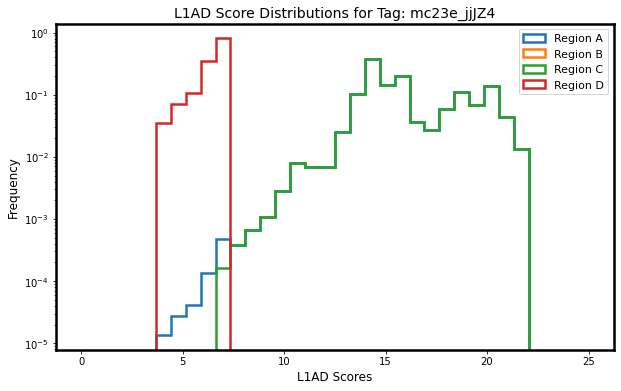

mc23e_ttbar_1lep


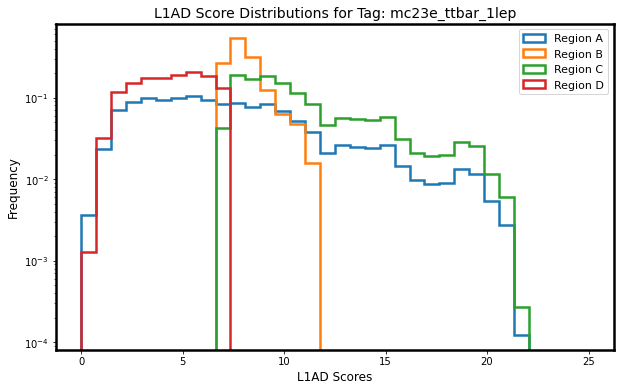

mc23e_ttbar_2lep


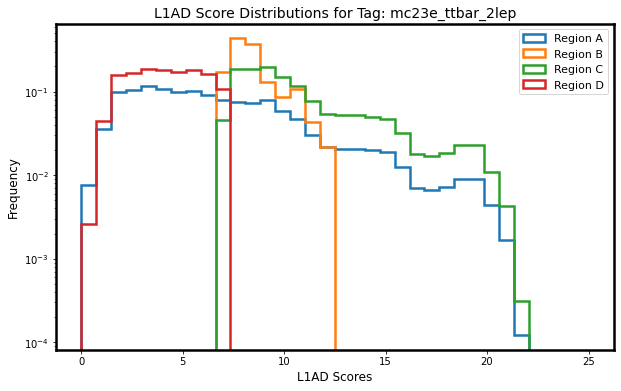

physMain_474448GRLReal


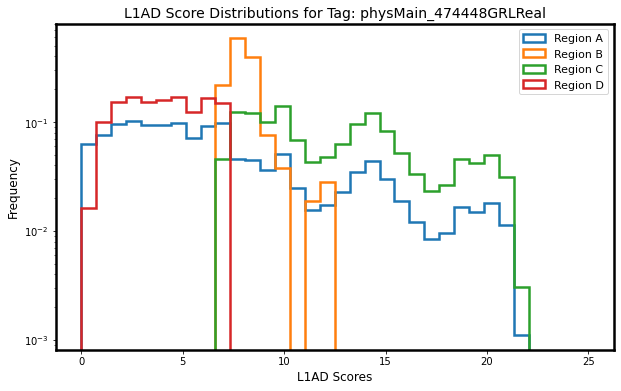

physMain_474679GRLReal


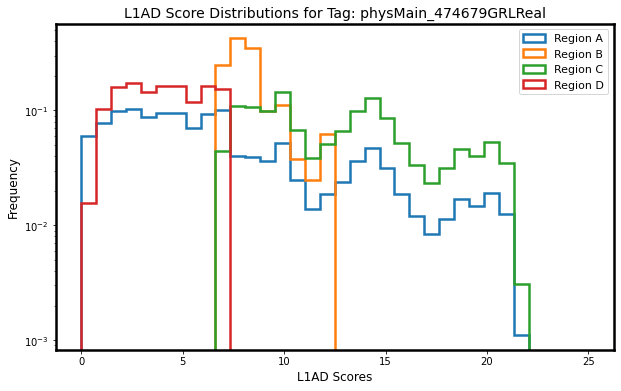

physMain_474679GRLinverse


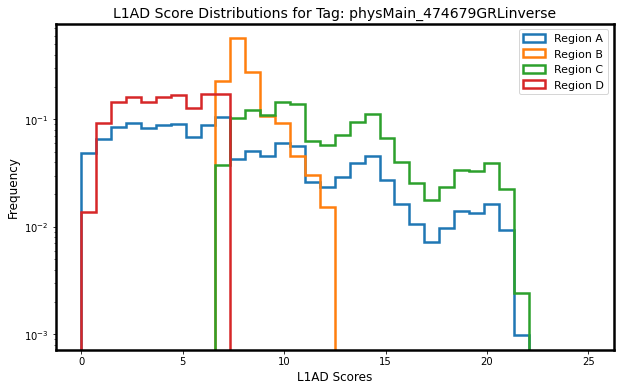

physMain_474770GRLReal


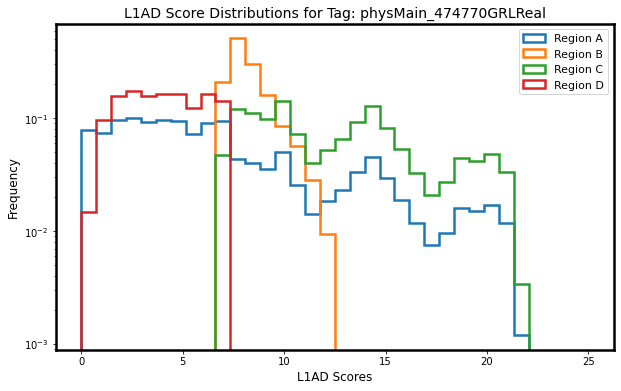

physMain_474926GRLReal


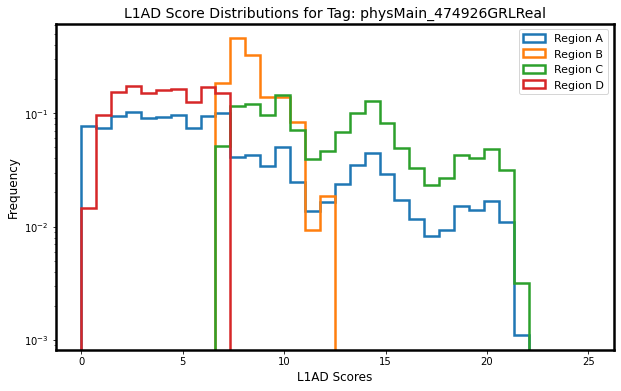

physMain_475052GRLReal


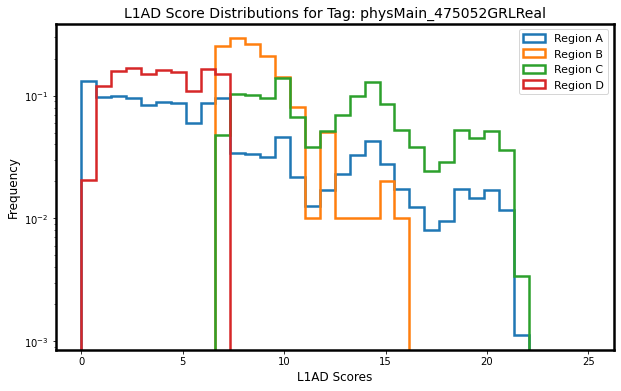

physMain_475066GRLReal


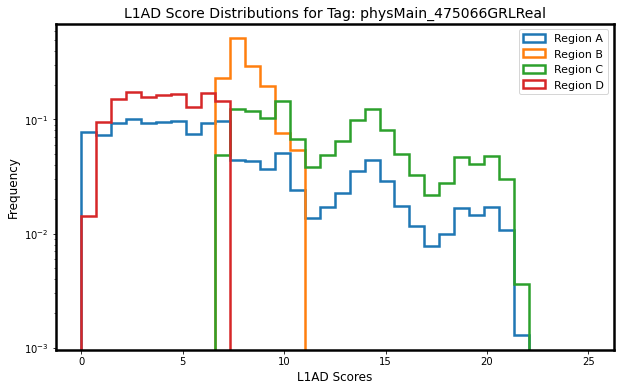

kaito


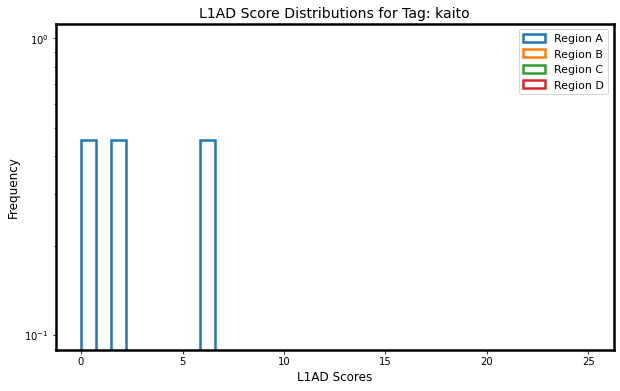

EB_test


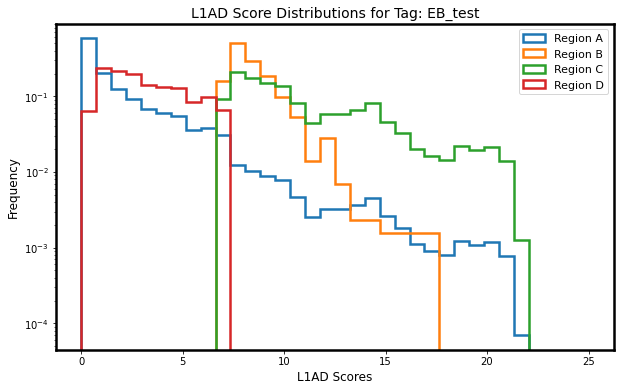

In [29]:
bins=np.linspace(0, 25, 35)
for tag, data_dict in datasets.items():

    if 'region_labels' not in data_dict: continue
    if tag == 'synthetic_events': continue

    print(tag)
    A_mask = ['A' in label for label in data_dict['region_labels']]
    B_mask = ['B' in label for label in data_dict['region_labels']]
    C_mask = ['C' in label for label in data_dict['region_labels']]
    D_mask = ['D' in label for label in data_dict['region_labels']]
    E_mask = ['E' in label for label in data_dict['region_labels']]
    F_mask = ['F' in label for label in data_dict['region_labels']]
    G_mask = ['G' in label for label in data_dict['region_labels']]

    A_scores = data_dict['topo2A_AD_scores'][A_mask]
    B_scores = data_dict['topo2A_AD_scores'][B_mask]
    C_scores = data_dict['topo2A_AD_scores'][C_mask]
    D_scores = data_dict['topo2A_AD_scores'][D_mask]
    E_scores = data_dict['topo2A_AD_scores'][E_mask]
    F_scores = data_dict['topo2A_AD_scores'][F_mask]
    G_scores = data_dict['topo2A_AD_scores'][G_mask]


    regions = {
        'A': A_scores[A_scores>0],
        'B': B_scores[B_scores>0],
        'C': C_scores[C_scores>0],
        'D': D_scores[D_scores>0]
    }

    # Plot histograms for each region on the same plot
    plt.figure(figsize=(10, 6))
    for region, scores in regions.items():
        plt.hist(scores, bins=bins, label=f'Region {region}', 
                 density=True, histtype='step', linewidth=2.5, fill=False)
    
    plt.title(f'L1AD Score Distributions for Tag: {tag}', fontsize=14)
    plt.xlabel('L1AD Scores', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(fontsize=11)
    plt.yscale('log')
    plt.show()

### Study AD score distributions of zerobias

In [3]:
noiseburst_LBs = {
    474562: [906],
    474679: [463, 464, 465],
    474991: [893, 942, 943],
    475052: [469]
}

In [9]:
datasets = {}

# GRLReal
GRL_real_tags = []
data_path = '/eos/home-m/mmcohen/ntuples/01-30-2025/ZeroBias/'

for filename in os.listdir(data_path):

    dataset_tag = filename.split('_01-30')[0]
    GRL_real_tags.append(dataset_tag)
    
    with h5py.File(data_path+filename, 'r') as hf:
        HLT_jets = hf['HLT_jets'][:]
        L1_jFexSR_jets = hf['L1_jFexSR_jets'][:]
        L1_jFexLR_jets = hf['L1_jFexLR_jets'][:]
        HLT_electrons = hf['HLT_electrons'][:]
        LRT_electrons = hf['LRT_electrons'][:]
        L1_egammas = hf['L1_egammas'][:]
        HLT_muons = hf['HLT_muons'][:]
        LRT_muons = hf['LRT_muons'][:]
        L1_muons = hf['L1_muons'][:]
        L1_eFex_taus = hf['L1_eFex_taus'][:]
        L1_jFex_taus = hf['L1_jFex_taus'][:]
        HLT_photons = hf['HLT_photons'][:]
        HLT_MET = hf['HLT_MET'][:].reshape(-1, 1, 3)  # Broadcasting MET
        L1_MET = hf['L1_MET'][:].reshape(-1, 1, 3)
        pass_L1_unprescaled = hf["pass_L1_unprescaled"][:]
        pass_HLT_unprescaled = hf["pass_HLT_unprescaled"][:]
        event_number = hf["event_number"][:]
        run_number = hf["run_number"][:]
        mu = hf["mu"][:]

        HLT_objects = np.concatenate([HLT_jets[:, :6, [0, 2, 3]], HLT_electrons[:, :3, :], HLT_muons[:, :3, :], HLT_photons[:, :3, :], HLT_MET], axis=1)
        L1_objects = np.concatenate([L1_jFexSR_jets[:, :6, :], L1_egammas[:, :3, :], L1_muons[:, :3, :], L1_eFex_taus[:, :3, :], L1_MET], axis=1)
        
        datasets[dataset_tag] = {
            'HLT_data': HLT_objects,
            'L1_data': L1_objects,
            'passL1': pass_L1_unprescaled==1,
            'passHLT': pass_HLT_unprescaled==1,
            'weights': np.ones(len(HLT_objects)),
            'event_numbers': event_number,
            'run_numbers': run_number,
            'pileups': mu
        }

datasets = ef.combine_data(datasets, tags_to_combine=GRL_real_tags, new_tag='GRL_real')

# GRLInverse
#data_path = '/eos/home-m/mmcohen/ntuples/01-30-2025/ZeroBias_GRLInverse/'
data_path = '/eos/home-m/mmcohen/ntuples/ZB_with_LBs/'
GRL_inverse_tags = []

for filename in os.listdir(data_path):

    dataset_tag = filename.split('_01-30')[0]
    GRL_inverse_tags.append(dataset_tag)
    
    with h5py.File(data_path+filename, 'r') as hf:
        HLT_jets = hf['HLT_jets'][:]
        L1_jFexSR_jets = hf['L1_jFexSR_jets'][:]
        L1_jFexLR_jets = hf['L1_jFexLR_jets'][:]
        HLT_electrons = hf['HLT_electrons'][:]
        LRT_electrons = hf['LRT_electrons'][:]
        L1_egammas = hf['L1_egammas'][:]
        HLT_muons = hf['HLT_muons'][:]
        LRT_muons = hf['LRT_muons'][:]
        L1_muons = hf['L1_muons'][:]
        L1_eFex_taus = hf['L1_eFex_taus'][:]
        L1_jFex_taus = hf['L1_jFex_taus'][:]
        HLT_photons = hf['HLT_photons'][:]
        HLT_MET = hf['HLT_MET'][:].reshape(-1, 1, 3)  # Broadcasting MET
        L1_MET = hf['L1_MET'][:].reshape(-1, 1, 3)
        pass_L1_unprescaled = hf["pass_L1_unprescaled"][:]
        pass_HLT_unprescaled = hf["pass_HLT_unprescaled"][:]
        event_number = hf["event_number"][:]
        run_number = hf["run_number"][:]
        mu = hf["mu"][:]
        LBs = hf["lumiBlock"][:]

        HLT_objects = np.concatenate([HLT_jets[:, :6, [0, 2, 3]], HLT_electrons[:, :3, :], HLT_muons[:, :3, :], HLT_photons[:, :3, :], HLT_MET], axis=1)
        L1_objects = np.concatenate([L1_jFexSR_jets[:, :6, :], L1_egammas[:, :3, :], L1_muons[:, :3, :], L1_eFex_taus[:, :3, :], L1_MET], axis=1)
        
        datasets[dataset_tag] = {
            'HLT_data': HLT_objects,
            'L1_data': L1_objects,
            'passL1': pass_L1_unprescaled==1,
            'passHLT': pass_HLT_unprescaled==1,
            'weights': np.ones(len(HLT_objects)),
            'event_numbers': event_number,
            'run_numbers': run_number,
            'pileups': mu,
            'LBs': LBs
        }

# Now we use the noisebusrt LBs to split the data
tags_to_process = list(datasets.keys())
for tag in tags_to_process:
    data_dict = datasets[tag]
    run_number = data_dict['run_numbers'][0]
    if run_number in noiseburst_LBs:
        nb_mask = np.isin(data_dict['LBs'], noiseburst_LBs[run_number])
        datasets[tag+'_nb'] = {key: value[nb_mask] for key, value in data_dict.items()}
        datasets[tag] = {key: value[~nb_mask] for key, value in data_dict.items()}


# Combine data into two tags: no_nb and nb
tags_no_nb = [tag for tag in datasets.keys() if not tag.endswith('_nb') and tag in GRL_inverse_tags]
tags_nb = [tag for tag in datasets.keys() if tag.endswith('_nb')]

datasets = ef.combine_data(datasets, tags_to_combine=tags_no_nb, new_tag='GRLInverse')
datasets = ef.combine_data(datasets, tags_to_combine=tags_nb, new_tag='GRLInverse_nb')

In [10]:
for tag, dict in datasets.items():
        for label, data in dict.items():
            if label.endswith('data'):
                datasets[tag][label] = np.reshape(data, newshape=(-1, 48))

In [11]:
for tag, data_dict in datasets.items():
    print(f'{tag}:')
    for key, value in data_dict.items():
        print(f'    {key}: {value.shape}')

GRL_real:
    HLT_data: (3805337, 48)
    L1_data: (3805337, 48)
    passL1: (3805337,)
    passHLT: (3805337,)
    weights: (3805337,)
    event_numbers: (3805337,)
    run_numbers: (3805337,)
    pileups: (3805337,)
GRLInverse:
    HLT_data: (49864, 48)
    L1_data: (49864, 48)
    passL1: (49864,)
    passHLT: (49864,)
    weights: (49864,)
    event_numbers: (49864,)
    run_numbers: (49864,)
    pileups: (49864,)
    LBs: (49864,)
GRLInverse_nb:
    HLT_data: (3160, 48)
    L1_data: (3160, 48)
    passL1: (3160,)
    passHLT: (3160,)
    weights: (3160,)
    event_numbers: (3160,)
    run_numbers: (3160,)
    pileups: (3160,)
    LBs: (3160,)


In [13]:
# Load the model
HLT_AE, HLT_encoder, HLT_MSE_AE, HLT_preprocessing_model = ef.initialize_model(
        input_dim=datasets['GRL_real']['HLT_data'].shape[1],
        pt_thresholds=[50, 30, 30, 30],
        pt_scale_factor=0.05,
        dropout_p=0.1,
        L2_reg_coupling=0.01,
        latent_dim=4,
        #large_network=large_network,
        saved_model_path='/eos/home-m/mmcohen/ad_trigger_development/trained_models/trial_125',
        save_version=1,
        obj_type='HLT',
        pt_normalization_type='global_division',
        overlap_removal=False
    )

/cvmfs/sft.cern.ch/lcg/views/LCG_106a_cuda/x86_64-el9-gcc11-opt/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 78 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
2025-02-26 18:50:00.892955: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-26 18:50:00.972067: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-

In [14]:
# Pass the data through the model
for tag, data_dict in datasets.items():
    data_dict['HLT_preprocessed_data'] = HLT_preprocessing_model.predict(data_dict['HLT_data'], verbose=0, batch_size=8)
    data_dict['HLT_AD_scores'] = HLT_MSE_AE.predict(data_dict['HLT_preprocessed_data'], batch_size=8, verbose=0)



I0000 00:00:1740592207.581783     740 service.cc:145] XLA service 0x7f1920014f90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740592207.581871     740 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2025-02-26 18:50:07.630005: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-26 18:50:07.721989: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1740592208.020409     740 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


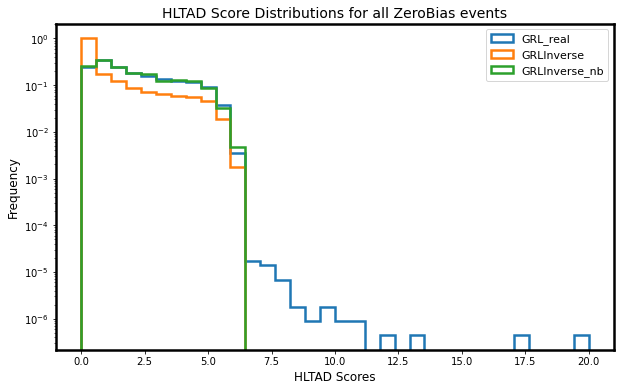

In [15]:
bins = np.linspace(0, 20, 35)
plt.figure(figsize=(10, 6))
for tag, data_dict in datasets.items():


    plt.hist(data_dict['HLT_AD_scores'], bins=bins, density=True, histtype='step', linewidth=2.5, fill=False, label=tag)
    
plt.title(f'HLTAD Score Distributions for all ZeroBias events', fontsize=14)
plt.xlabel('HLTAD Scores', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=11)
plt.yscale('log')
plt.show()

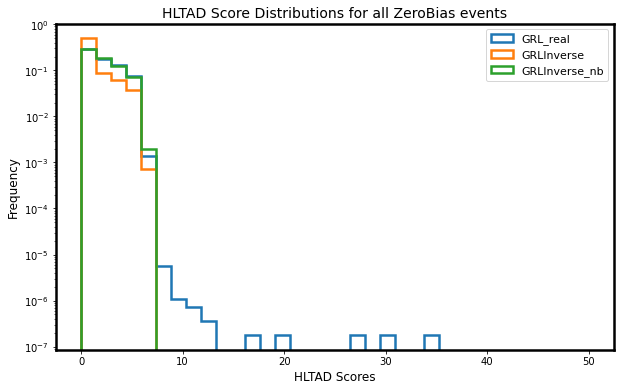

In [19]:
bins = np.linspace(0, 50, 35)
plt.figure(figsize=(10, 6))
for tag, data_dict in datasets.items():


    plt.hist(data_dict['HLT_AD_scores'], bins=bins, density=True, histtype='step', linewidth=2.5, fill=False, label=tag)
    
plt.title(f'HLTAD Score Distributions for all ZeroBias events', fontsize=14)
plt.xlabel('HLTAD Scores', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=11)
plt.yscale('log')
plt.show()

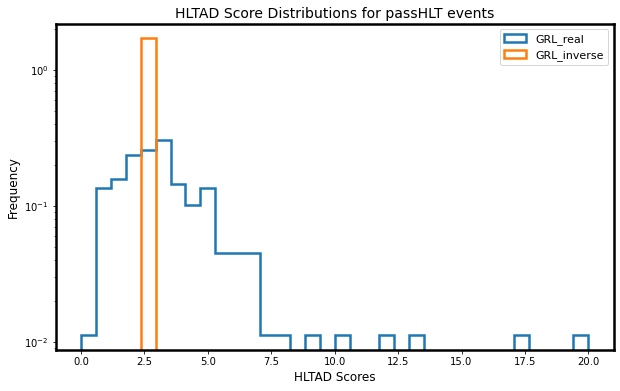

In [21]:
bins = np.linspace(0, 20, 35)
plt.figure(figsize=(10, 6))
for tag, data_dict in datasets.items():

    
    plt.hist(data_dict['HLT_AD_scores'][data_dict['passHLT']], bins=bins, density=True, histtype='step', linewidth=2.5, fill=False, label=tag)
    
plt.title(f'HLTAD Score Distributions for passHLT events', fontsize=14)
plt.xlabel('HLTAD Scores', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=11)
plt.yscale('log')
plt.show()

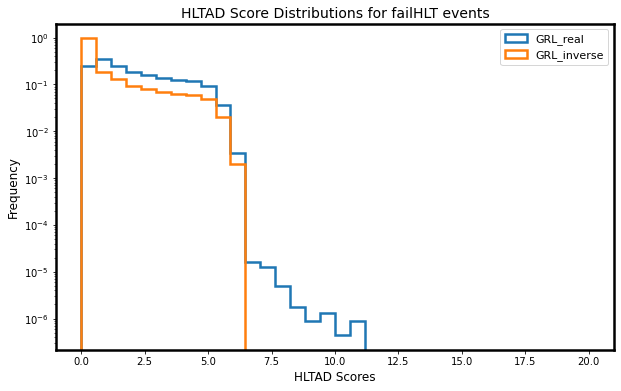

In [22]:
bins = np.linspace(0, 20, 35)
plt.figure(figsize=(10, 6))
for tag, data_dict in datasets.items():

    
    plt.hist(data_dict['HLT_AD_scores'][~data_dict['passHLT']], bins=bins, density=True, histtype='step', linewidth=2.5, fill=False, label=tag)
    
plt.title(f'HLTAD Score Distributions for failHLT events', fontsize=14)
plt.xlabel('HLTAD Scores', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=11)
plt.yscale('log')
plt.show()